# Neural network filters

## I. Filters on a toy dataset

### 1. Dataset

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

import os
import numpy as np
import matplotlib.pyplot as plt
from random import randrange

In [2]:
batch_size = 32
epochs = 30
IMG_HEIGHT = 150
IMG_WIDTH = 150
KERNEL_SIZE = 3

In [3]:
# TensorFlow
def to_grayscale(image):
    return tf.image.rgb_to_grayscale(image)

train_image_generator = ImageDataGenerator(rescale=1./255,
                                       rotation_range=45,
                                           width_shift_range=0.15,
                                           height_shift_range=0.15,
                                           horizontal_flip=True,
                                           zoom_range=0.3)

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                          directory="dataset/min/train/",
                                                          shuffle=True,
                                                          target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                          class_mode="binary")

Found 202 images belonging to 2 classes.


### 2. Dense network

In [4]:
model = Sequential([
    Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    Dense(2048, activation="relu"),
    Dense(1024, activation="relu"),
    Dense(512, activation="relu"),
    Dense(1)
])

model.compile(optimizer="adam", loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=["accuracy"])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 67500)             0         
_________________________________________________________________
dense (Dense)                (None, 2048)              138242048 
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 513       
Total params: 140,865,537
Trainable params: 140,865,537
Non-trainable params: 0
_________________________________________________________________


In [6]:
history = model.fit(train_data_gen, epochs=epochs)

Epoch 1/30
7/7 [==============================] - 4s 473ms/step - loss: 62.1106 - accuracy: 0.4874
Epoch 2/30
7/7 [==============================] - 3s 463ms/step - loss: 11.6529 - accuracy: 0.5135
Epoch 3/30
7/7 [==============================] - 3s 468ms/step - loss: 13.1601 - accuracy: 0.4800
Epoch 4/30
7/7 [==============================] - 3s 470ms/step - loss: 6.8692 - accuracy: 0.4795
Epoch 5/30
7/7 [==============================] - 4s 527ms/step - loss: 3.6943 - accuracy: 0.4700
Epoch 6/30
7/7 [==============================] - 4s 505ms/step - loss: 1.0789 - accuracy: 0.5094
Epoch 7/30
7/7 [==============================] - 3s 477ms/step - loss: 1.0225 - accuracy: 0.4896
Epoch 8/30
7/7 [==============================] - 3s 462ms/step - loss: 1.1874 - accuracy: 0.4694
Epoch 9/30
7/7 [==============================] - 4s 477ms/step - loss: 1.1521 - accuracy: 0.4522
Epoch 10/30
7/7 [==============================] - 3s 435ms/step - loss: 1.1649 - accuracy: 0.4233
Epoch 11/30
7/7 

### 2.1. Filters

dense (67500, 2048)


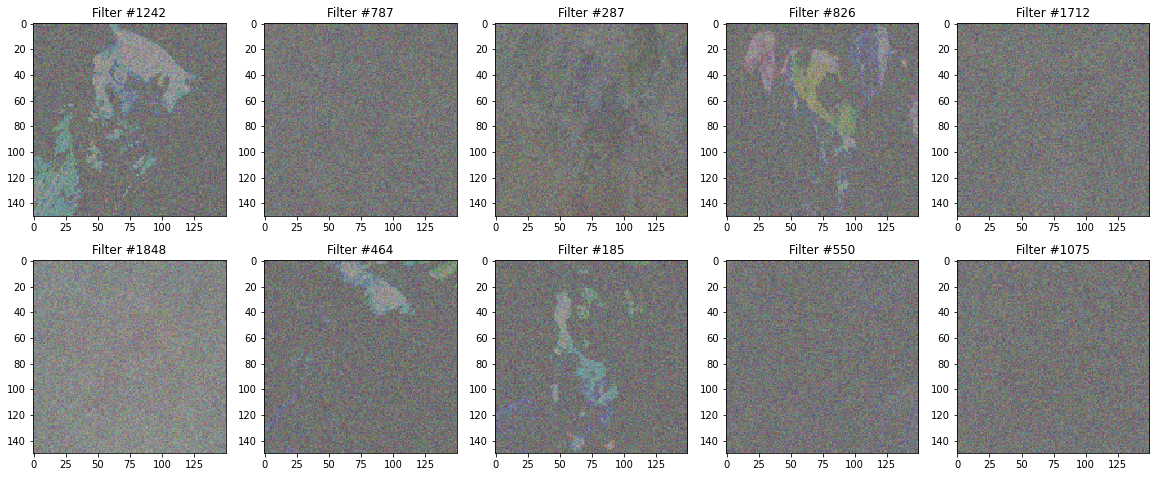

In [7]:
NB_FIGURES = 10
NB_ROWS = 2
NB_COLUMNS = 5

layer = model.layers[1]
weights, bias = layer.get_weights()
print(layer.name, weights.shape)

# normalize
f_min, f_max = weights.min(), weights.max()
filters = (weights - f_min) / (f_max - f_min)

# plot
indices = np.random.randint(filters.shape[1], size=NB_FIGURES)
fig, ax = plt.subplots(NB_ROWS, NB_COLUMNS, figsize=(20, 8))
for i in range(NB_FIGURES):
    filt = filters[:, indices[i]].reshape(IMG_HEIGHT, IMG_WIDTH, 3)
    ax[i//NB_COLUMNS, i%NB_COLUMNS].imshow(filt, interpolation='nearest')
    ax[i//NB_COLUMNS, i%NB_COLUMNS].set_title("Filter #{}".format(indices[i]))


### 3. Convolutional network

In [8]:
model = Sequential([
    Conv2D(16, KERNEL_SIZE, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, KERNEL_SIZE, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, KERNEL_SIZE, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

model.compile(optimizer="adam", loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)       

In [9]:
history = model.fit(train_data_gen, epochs=epochs)

Epoch 1/30
7/7 [==============================] - 3s 311ms/step - loss: 1.1010 - accuracy: 0.5394
Epoch 2/30
7/7 [==============================] - 2s 333ms/step - loss: 0.6953 - accuracy: 0.5263
Epoch 3/30
7/7 [==============================] - 3s 338ms/step - loss: 0.6966 - accuracy: 0.4790
Epoch 4/30
7/7 [==============================] - 3s 391ms/step - loss: 0.6910 - accuracy: 0.5208
Epoch 5/30
7/7 [==============================] - 3s 385ms/step - loss: 0.6867 - accuracy: 0.5202
Epoch 6/30
7/7 [==============================] - 2s 331ms/step - loss: 0.6827 - accuracy: 0.4962
Epoch 7/30
7/7 [==============================] - 2s 326ms/step - loss: 0.6796 - accuracy: 0.5410
Epoch 8/30
7/7 [==============================] - 3s 336ms/step - loss: 0.6610 - accuracy: 0.6068
Epoch 9/30
7/7 [==============================] - 2s 375ms/step - loss: 0.6566 - accuracy: 0.5432
Epoch 10/30
7/7 [==============================] - 2s 312ms/step - loss: 0.6411 - accuracy: 0.5854
Epoch 11/30
7/7 [==

### 3.1. Filters

conv2d (3, 3, 3, 16)
16


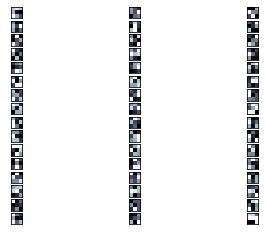

conv2d_1 (3, 3, 16, 32)
32


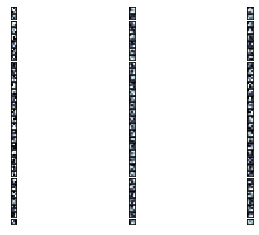

conv2d_2 (3, 3, 32, 64)
64


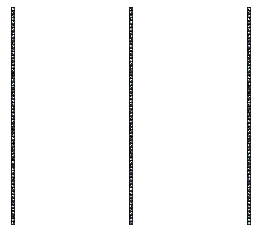

In [10]:
for layer in model.layers:
    if "conv" in layer.name:
        weights, bias = layer.get_weights()
        print(layer.name, weights.shape)
        
        # normalize
        f_min, f_max = weights.min(), weights.max()
        filters = (weights - f_min) / (f_max - f_min)
        print(filters.shape[3])
        filter_cnt=1
        
        # plot
        for i in range(filters.shape[3]):
            filt = filters[:, :, :, i]
            for j in range(filters.shape[0]):
                ax = plt.subplot(filters.shape[3], filters.shape[0], filter_cnt)
                ax.set_xticks([])
                ax.set_yticks([])
                plt.imshow(filt[:, :, j], cmap="bone")
                filter_cnt += 1
        plt.show()

### 3.2. Feature maps
  
Let's visualize the feature map from this image:  
![dog](dataset/min/train/dog/dog.67.jpg)

(1, 150, 150, 16)
(1, 75, 75, 16)
(1, 75, 75, 16)
(1, 75, 75, 32)
(1, 37, 37, 32)
(1, 37, 37, 64)
(1, 18, 18, 64)
(1, 18, 18, 64)
(1, 20736)
(1, 512)
(1, 1)


<ipython-input-11-05c1c5f56821>:27: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


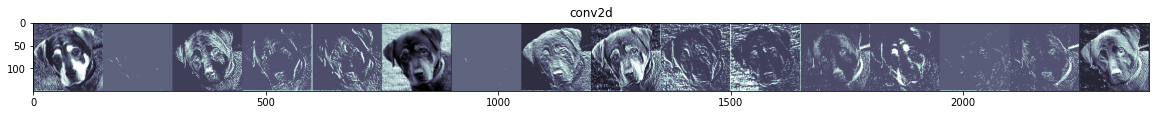

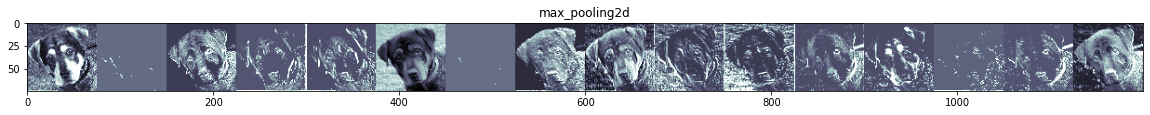

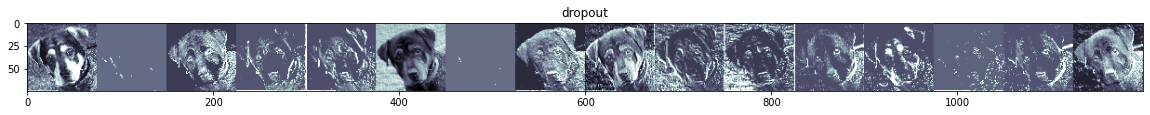

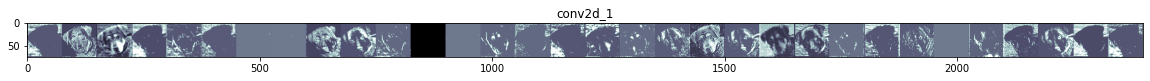

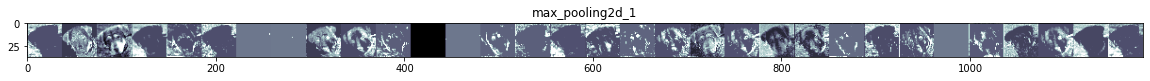

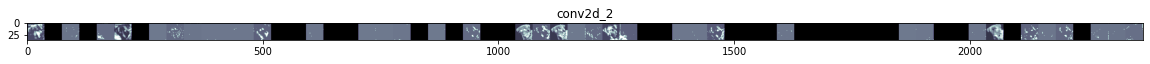

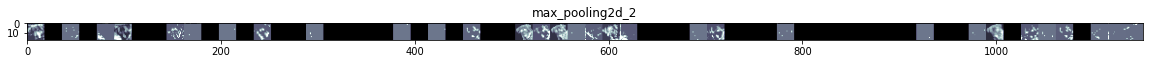

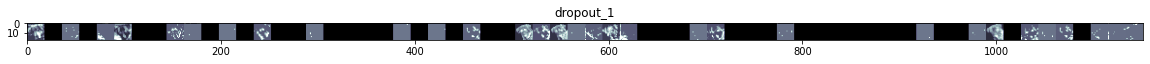

In [11]:
img_path = "dataset/min/train/dog/dog.67.jpg"

successive_outputs = [layer.output for layer in model.layers]

visualization_model = tf.keras.models.Model(inputs=model.input, outputs=successive_outputs)

img = load_img(img_path, target_size=(150, 150))

x = img_to_array(img)
x = x.reshape((1,) + x.shape) # add batch dimension

x /= 255.

successive_feature_maps = visualization_model.predict(x)

layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    print(feature_map.shape)
    if len(feature_map.shape) == 4:
        n_features = feature_map.shape[-1]
        size = feature_map.shape[1]
        display_grid = np.zeros((size, size * n_features))
        
        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i * size : (i+1) * size] = x
        
        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='bone')

## II. VGG16 filters

In [12]:
from tensorflow.keras.applications.vgg16 import VGG16

vgg_model = VGG16()

vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

### 1. Filters

### 2. Feature maps

(1, 224, 224, 3)
(1, 224, 224, 64)
(1, 224, 224, 64)
(1, 112, 112, 64)
(1, 112, 112, 128)
(1, 112, 112, 128)


<ipython-input-13-0a1e9ea92a4c>:27: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


(1, 56, 56, 128)
(1, 56, 56, 256)
(1, 56, 56, 256)
(1, 56, 56, 256)
(1, 28, 28, 256)
(1, 28, 28, 512)
(1, 28, 28, 512)
(1, 28, 28, 512)
(1, 14, 14, 512)
(1, 14, 14, 512)
(1, 14, 14, 512)
(1, 14, 14, 512)
(1, 7, 7, 512)
(1, 25088)
(1, 4096)
(1, 4096)
(1, 1000)


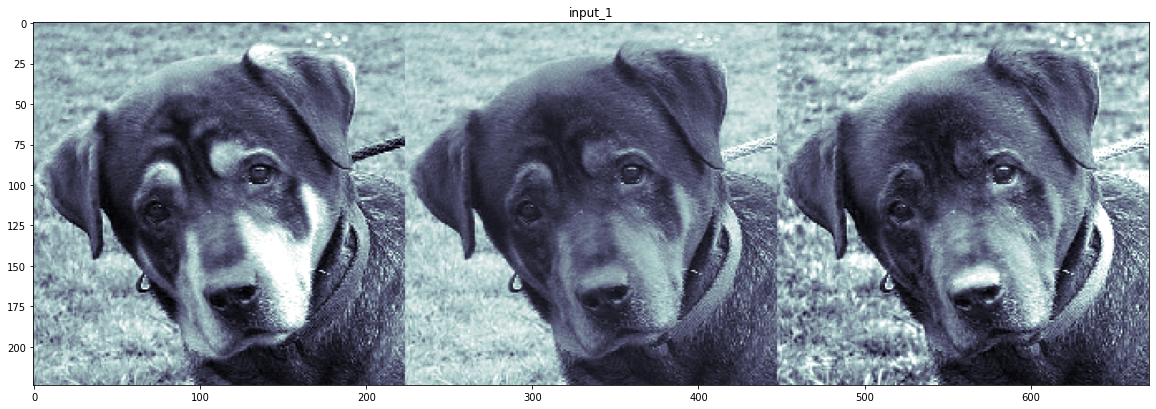

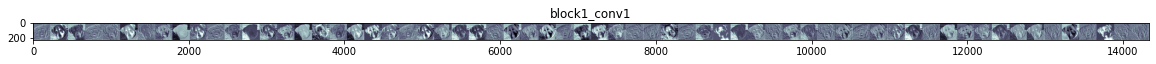

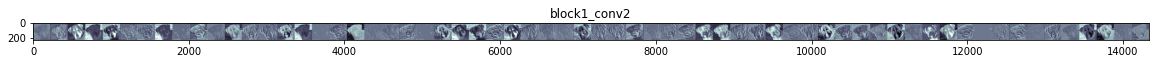

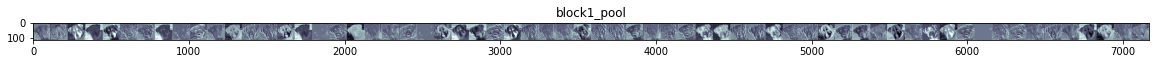

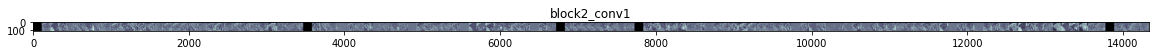

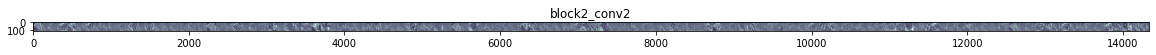

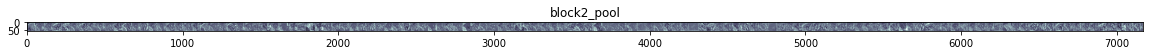

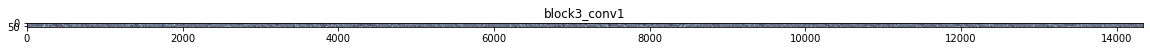

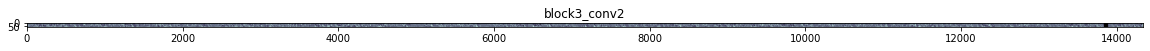

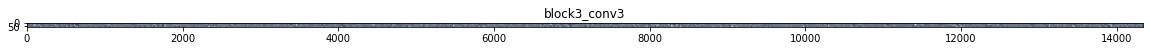

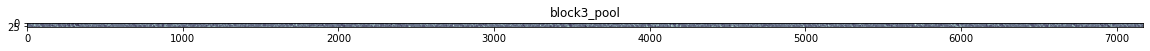

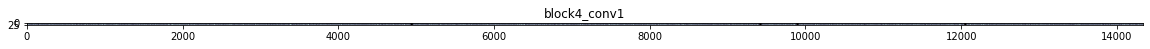

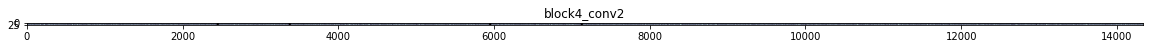

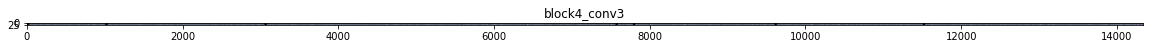

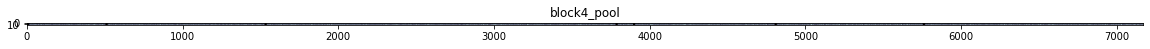

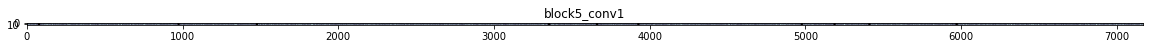

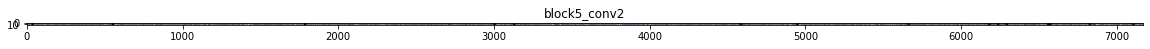

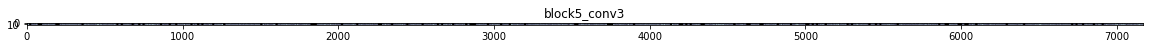

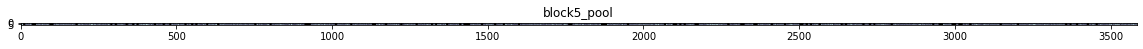

In [13]:
img_path = "dataset/min/train/dog/dog.67.jpg"

successive_outputs = [layer.output for layer in vgg_model.layers]

visualization_model = tf.keras.models.Model(inputs=vgg_model.input, outputs=successive_outputs)

img = load_img(img_path, target_size=(224, 224))

x = img_to_array(img)
x = x.reshape((1,) + x.shape) # add batch dimension

x /= 255.

successive_feature_maps = visualization_model.predict(x)

layer_names = [layer.name for layer in vgg_model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    print(feature_map.shape)
    if len(feature_map.shape) == 4:
        n_features = feature_map.shape[-1]
        size = feature_map.shape[1]
        display_grid = np.zeros((size, size * n_features))
        
        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i * size : (i+1) * size] = x
        
        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='bone')